In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Class']

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


# **Simplest Neural Network**

In [16]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))    
model.add(Dense(1, activation='sigmoid'))                
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

Epoch 1/1
190820/190820 [==============================] - 7s 36us/step - loss: 1.4236 - acc: 0.9107


In [18]:
print("Loss: ", model.evaluate(X_test.as_matrix(), y_test, verbose=0))

Loss:  [0.026241128438311744, 0.9983721152925404]


In [0]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          93834  0    93834
1            153  0      153
__all__    93987  0    93987


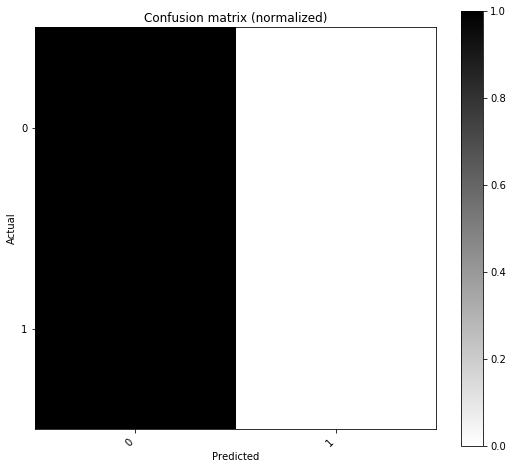

In [20]:
from pandas_ml import ConfusionMatrix
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()

In [21]:
confusion_matrix.confusion_matrix.print_stats()

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: RuntimeWarning: overflow encountered in long_scalars
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:61: RuntimeWarning: overflow encountered in long_scalars
  den = (np.float64(nis2 + njs2) / 2 - np.float64(nis2 * njs2) / n2)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWarning: invalid value encountered in true_divide
  * (self.TN + self.FP) * (self.TN + self.FN)))
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FNR) / s

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          93834  0    93834
1            153  0      153
__all__    93987  0    93987


Overall Statistics:

Accuracy: 0.9983721152925404
95% CI: (0.9980930305372964, 0.9986196754889775)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  93987       93987
P: Condition positive                       93834         153
N: Condition negative                         153       93834
Test outcome positive                       93987           0
Test outcome negative                           0       93987
TP: True Positive                           93834           0
TN: True Negative                               0       93834
FP: False Positive                            153           0
FN: False Negative                              0         153
TPR

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


# Neural Network after oversampling , scaling and PCA

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


array([[ 2.52913846,  0.0440578 ,  0.21282189, ..., -0.26463882,
         0.24327175, -0.60555832],
       [ 2.31805451,  0.96203168,  2.3628586 , ...,  0.43168622,
         1.03868831,  0.87769978],
       [ 2.33210027, -0.84903203,  0.11887715, ...,  0.50431203,
        -1.46003687,  1.19787831],
       ...,
       [-3.9317813 ,  0.69712037,  0.3381291 , ..., -1.34374621,
        -0.52533398, -0.14498921],
       [-0.81040062, -0.36248982, -0.65349981, ..., -2.38825451,
        -0.17895565, -0.65111781],
       [-2.98689522,  2.71305606, -1.62471087, ...,  0.19281303,
        -0.0407112 ,  1.48610869]])

In [23]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 27)                297       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                560       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [24]:
X2_test = pca.fit_transform(X_test)
h = model2.fit(X2, y2, epochs=5, validation_data=(X2_test, y_test))

Train on 380962 samples, validate on 93987 samples
Epoch 1/5
380962/380962 [==============================] - 17s 44us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 7.5080 - val_acc: 0.5291
Epoch 2/5
380962/380962 [==============================] - 17s 44us/step - loss: 0.0076 - acc: 0.9977 - val_loss: 7.5080 - val_acc: 0.5291
Epoch 3/5
380962/380962 [==============================] - 17s 44us/step - loss: 0.0062 - acc: 0.9982 - val_loss: 7.5079 - val_acc: 0.5291
Epoch 4/5
380962/380962 [==============================] - 16s 43us/step - loss: 0.0050 - acc: 0.9986 - val_loss: 7.5080 - val_acc: 0.5291
Epoch 5/5
380962/380962 [==============================] - 16s 43us/step - loss: 0.0044 - acc: 0.9987 - val_loss: 7.5080 - val_acc: 0.5291


In [25]:
print("Loss: ", model2.evaluate(X2_test, y_test, verbose=2))

Loss:  [7.508046195029457, 0.5290625299243512]


In [0]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y_test)

Confusion matrix:
Predicted  False   True  __all__
Actual                          
False      49668  44166    93834
True          96     57      153
__all__    49764  44223    93987


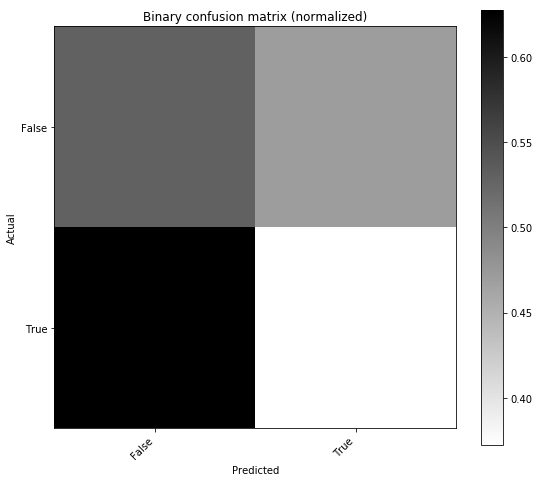

population: 93987
P: 153
N: 93834
PositiveTest: 44223
NegativeTest: 49764
TP: 57
TN: 49668
FP: 44166
FN: 96
TPR: 0.37254901960784315
TNR: 0.5293177313127437
PPV: 0.0012889220541347263
NPV: 0.9980708946226188
FPR: 0.4706822686872562
FDR: 0.9987110779458652
FNR: 0.6274509803921569
ACC: 0.5290625299243512
F1_score: 0.002568956192536506
MCC: -0.007926113140539724
informedness: -0.09813324907941312
markedness: -0.000640183323246446
prevalence: 0.0016278847074595424
LRP: 0.7915085066766824
LRN: 1.185395733553146
DOR: 0.6677166825159624
FOR: 0.0019291053773812395


In [28]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()